# FUNDAMENTOS DE DATA SCIENCE


## REGRESION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [74]:
df = pd.read_csv('qog_std_cs_jan18.csv')

In [75]:
df.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.wdi_gendeqr.value_counts()

3.0    22
3.5    20
4.0    19
2.5    12
4.5     5
1.5     1
2.0     1
Name: wdi_gendeqr, dtype: int64

In [9]:
df.undp_hdi.value_counts()

0.637    3
0.798    2
0.762    2
0.724    2
0.764    2
        ..
0.768    1
0.694    1
0.470    1
0.894    1
0.576    1
Name: undp_hdi, Length: 158, dtype: int64

In [ ]:
df.wdi_gendeqr.value_counts()

In [11]:
model1 = smf.ols('wdi_gendeqr ~ undp_hdi', df)

In [12]:
model1 = model1.fit()

In [13]:
results = model1.summary()

In [14]:
results.tables[0]

Dep. Variable:,wdi_gendeqr,R-squared:,0.269
Model:,OLS,Adj. R-squared:,0.259
Method:,Least Squares,F-statistic:,27.92
Date:,"Mon, 14 Mar 2022",Prob (F-statistic):,1.17e-06
Time:,20:23:20,Log-Likelihood:,-63.048
No. Observations:,78,AIC:,130.1
Df Residuals:,76,BIC:,134.8
Df Model:,1,,
Covariance Type:,nonrobust,,


In [17]:
print(results)

                            OLS Regression Results                            
Dep. Variable:            wdi_gendeqr   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     27.92
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.17e-06
Time:                        20:23:20   Log-Likelihood:                -63.048
No. Observations:                  78   AIC:                             130.1
Df Residuals:                      76   BIC:                             134.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6987      0.320      5.303      0.0

# Desafio 1 Credito

In [25]:
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import warnings
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos


In [43]:
df = pd.read_csv('Credit.csv')

In [44]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [23]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [26]:
print(df['Ethnicity'].value_counts())
print(df['Married'].value_counts())
print(df['Student'].value_counts())
print(df['Gender'].value_counts())

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Yes    245
No     155
Name: Married, dtype: int64
No     360
Yes     40
Name: Student, dtype: int64
Female    207
 Male     193
Name: Gender, dtype: int64


In [50]:
df['Gender'] =  np.where(df['Gender'] == " Male", 1, 0)
df['Student'] = df['Student'].replace(['No', 'Yes'], [0, 1])
df['AfrAmerican'] = np.where(df['Ethnicity'] == "African American", 1,0)
df['Ethnicity'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df['Married'] = df['Married'].replace(['No', 'Yes'], [1, 0])

In [51]:
df.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Male,AfrAmerican,Asian
0,14.891,3606,283,2,34,11,1,0,0,0,333,1,0,0
1,106.025,6645,483,3,82,15,0,1,0,1,903,0,0,1
2,104.593,7075,514,4,71,11,1,0,1,1,580,1,0,1
3,148.924,9504,681,3,36,11,0,0,1,1,964,0,0,1
4,55.882,4897,357,2,68,16,1,0,0,0,331,1,0,0
5,80.180,8047,569,4,77,10,1,0,1,0,1151,1,0,0
6,20.996,3388,259,2,37,12,0,0,1,0,203,0,1,0
7,71.408,7114,512,2,87,9,1,0,1,1,872,1,0,1
8,15.125,3300,266,5,66,13,0,0,1,0,279,0,0,0
9,71.061,6819,491,3,41,19,0,1,0,0,1350,0,1,0


# EDA (EXPLORATORY DATA ANALYSIS)

# Desafío 2: Genere gráficos descriptivos para las variables continuas


In [48]:
def plot_hist(df, variable):
    tmp_mean = np.mean(df[variable])
    tmp_median = np.median(df[variable]) 
    plt.hist(df[variable], color='dodgerblue', alpha=.7) 
    plt.axvline(tmp_mean, color='tomato', label="Media:{0}".format(round(tmp_mean, 1)))
    plt.axvline(tmp_median, color='#f2b41e', label="Mediana:{0}".format(round(tmp_median, 1)))
    plt.title("Histograma para {0}".format(variable))
    plt.legend()

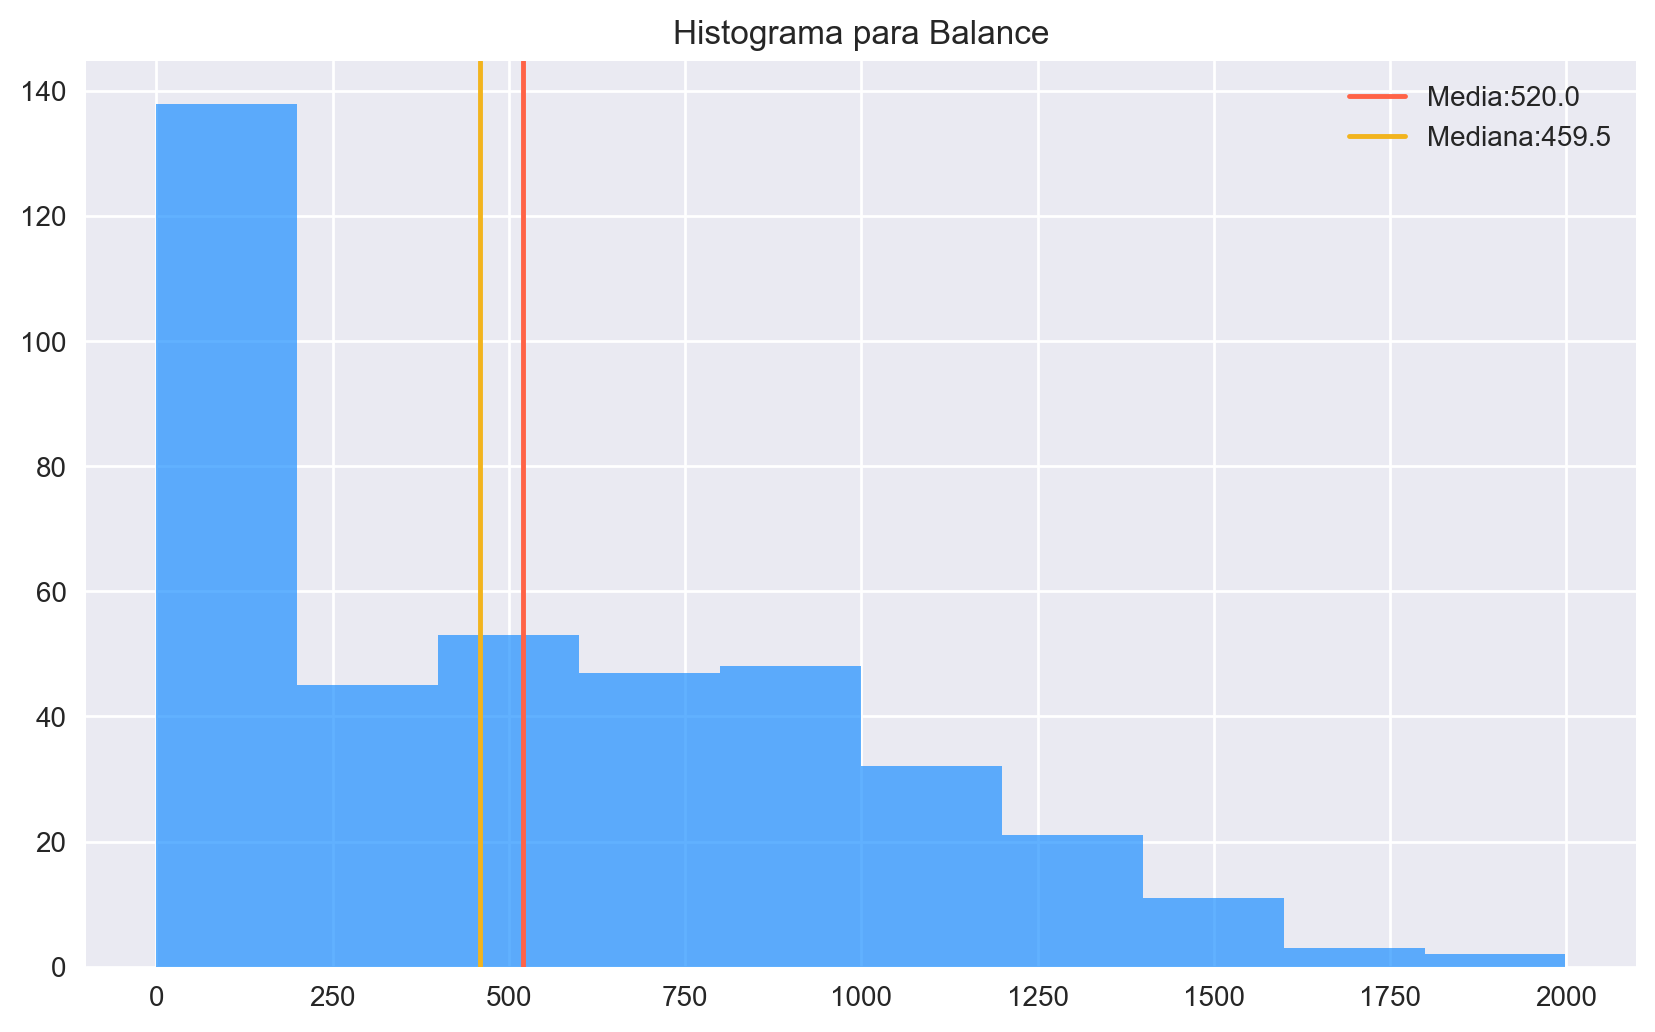

In [49]:
 plot_hist(df, 'Balance')

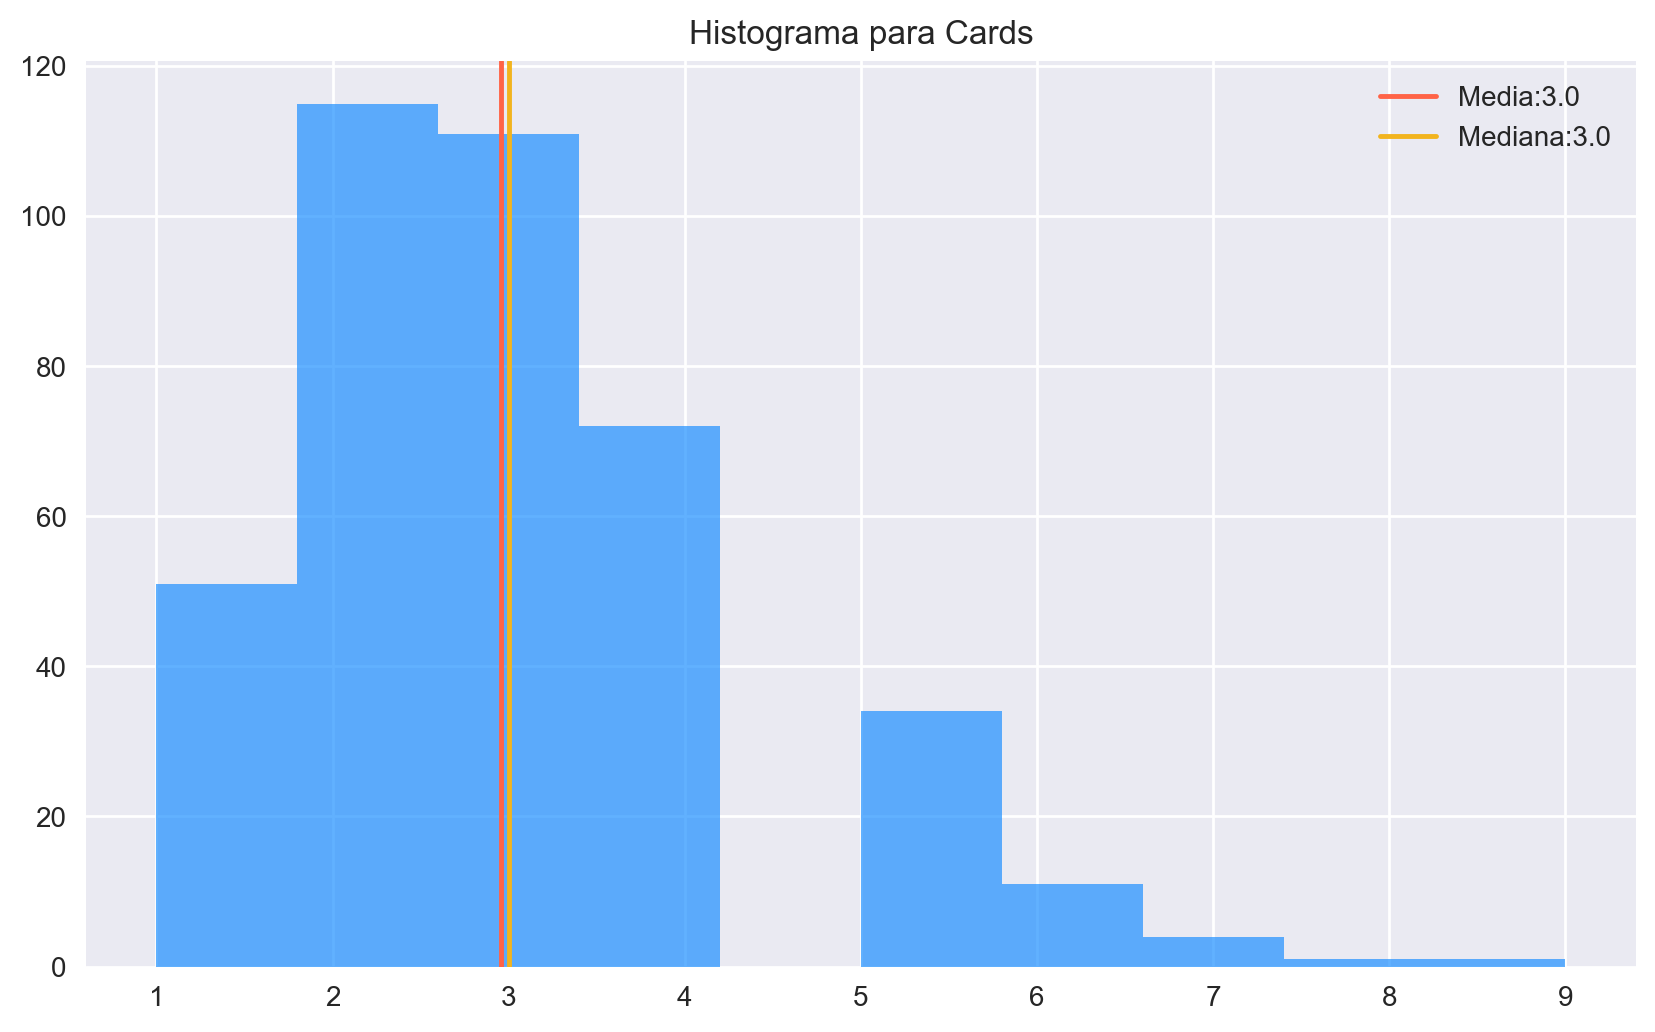

In [52]:
plot_hist(df,'Cards')

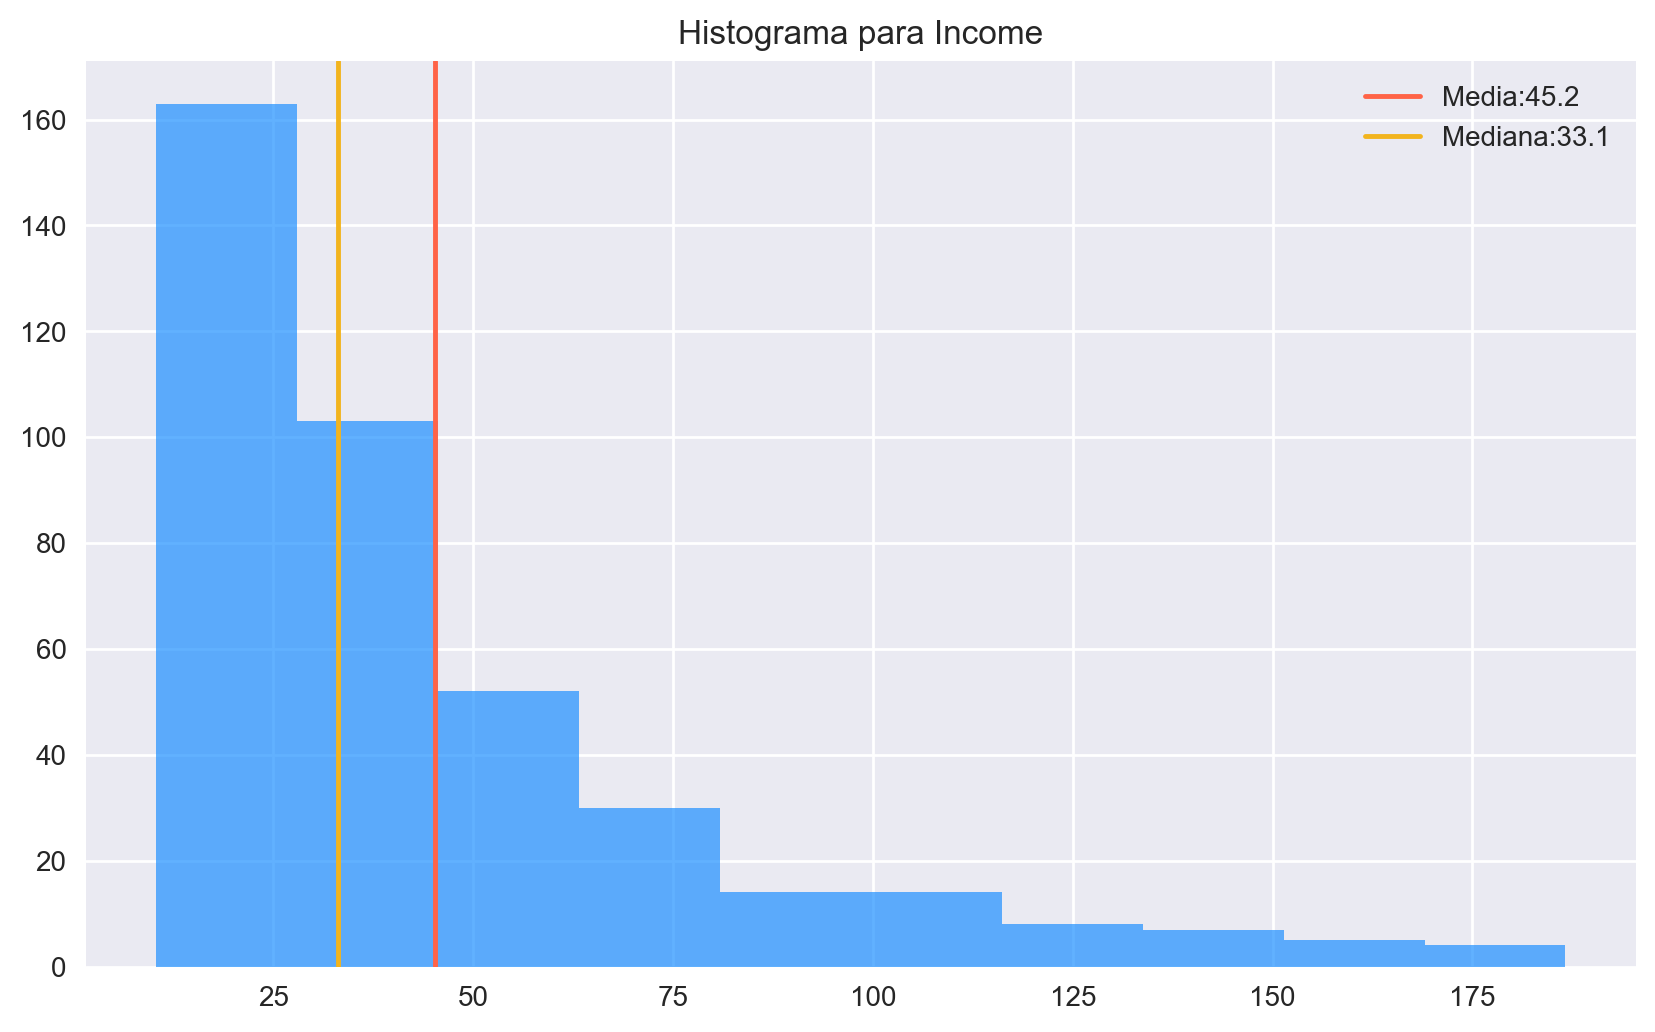

In [53]:
plot_hist(df, 'Income')

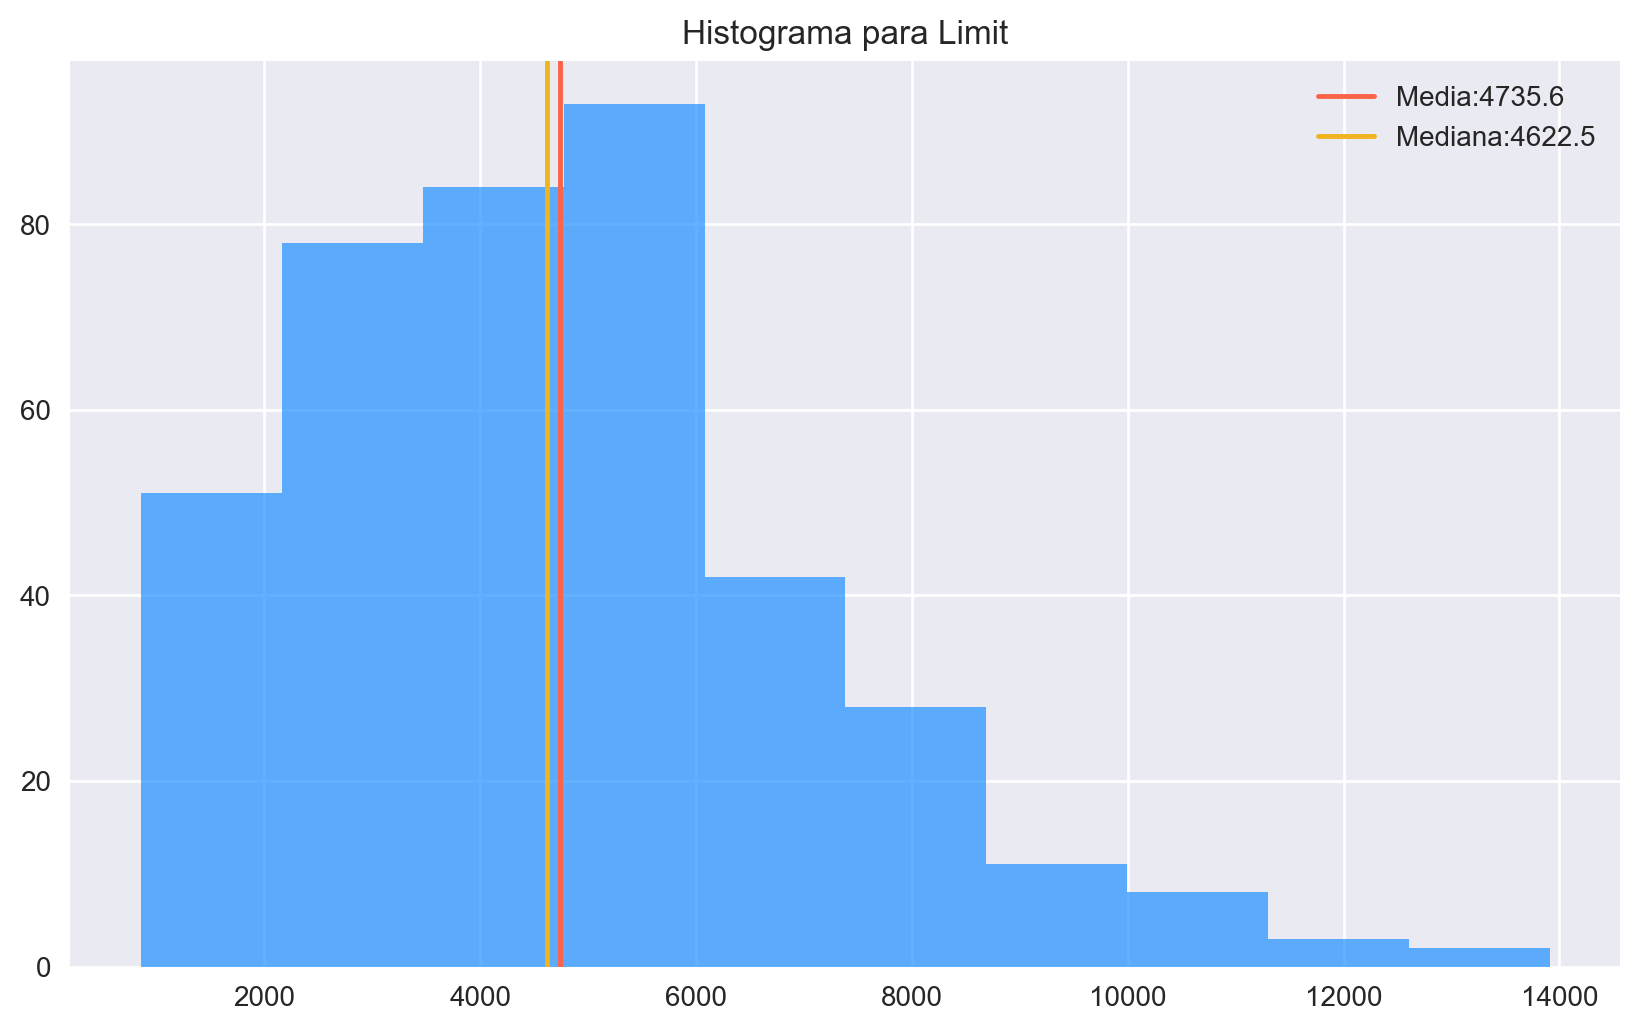

In [54]:
 plot_hist(df, 'Limit')

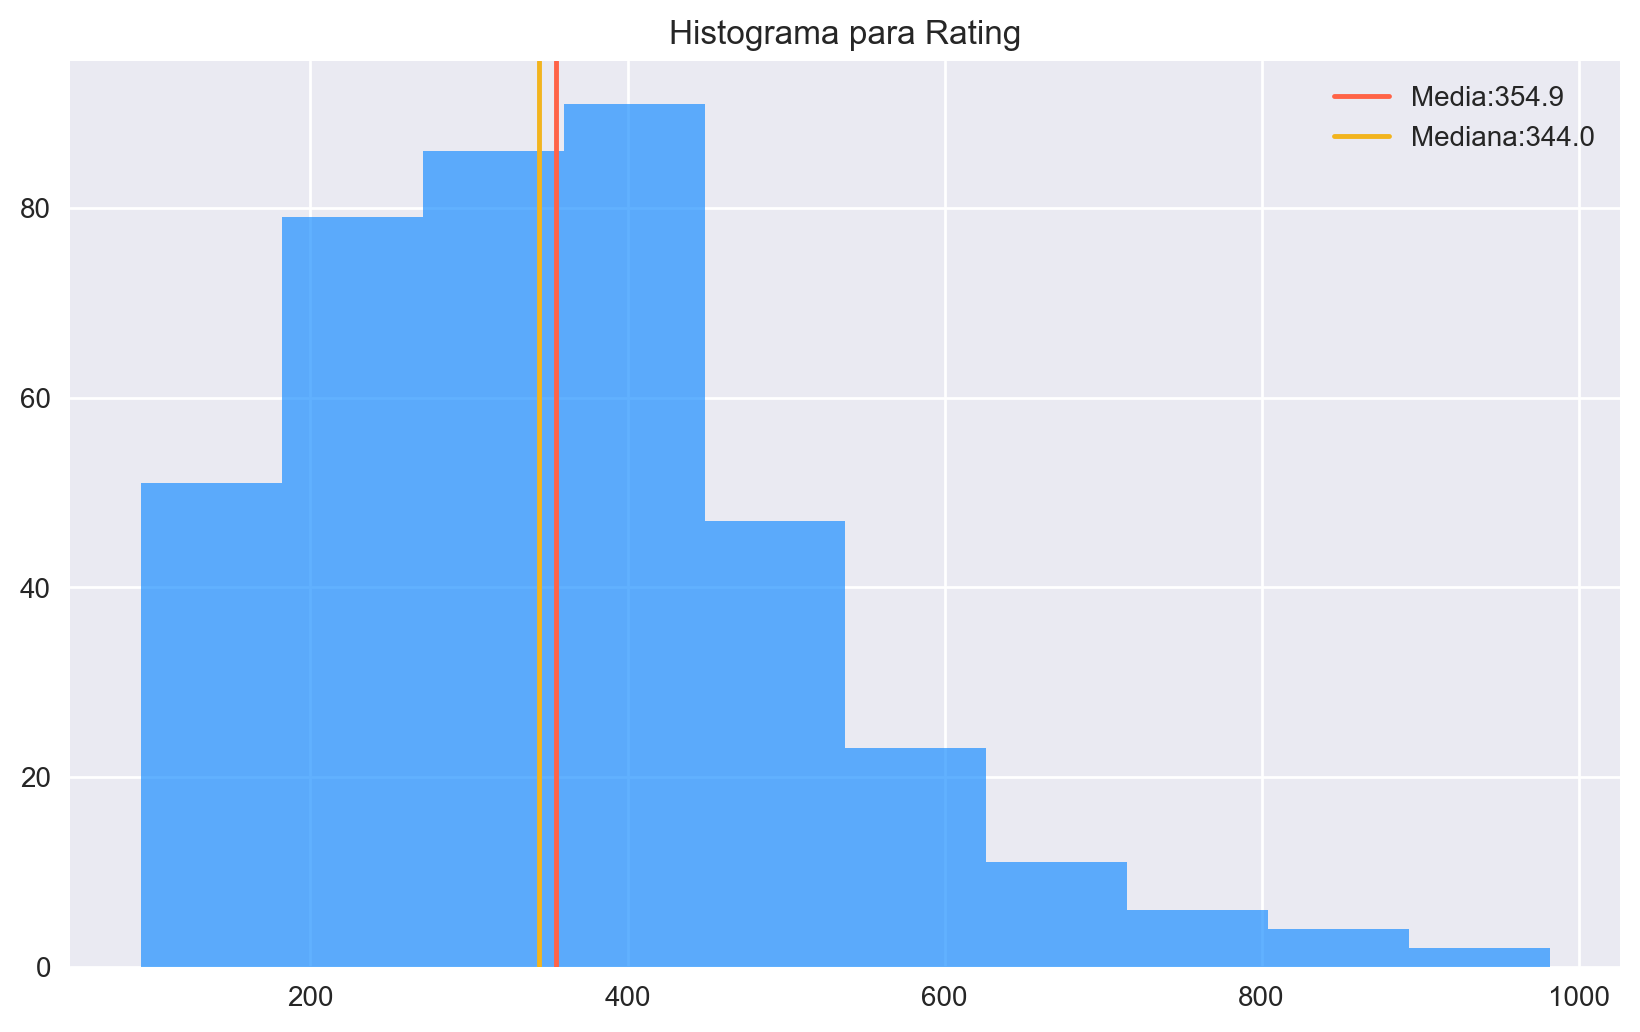

In [55]:
 plot_hist(df, 'Rating')

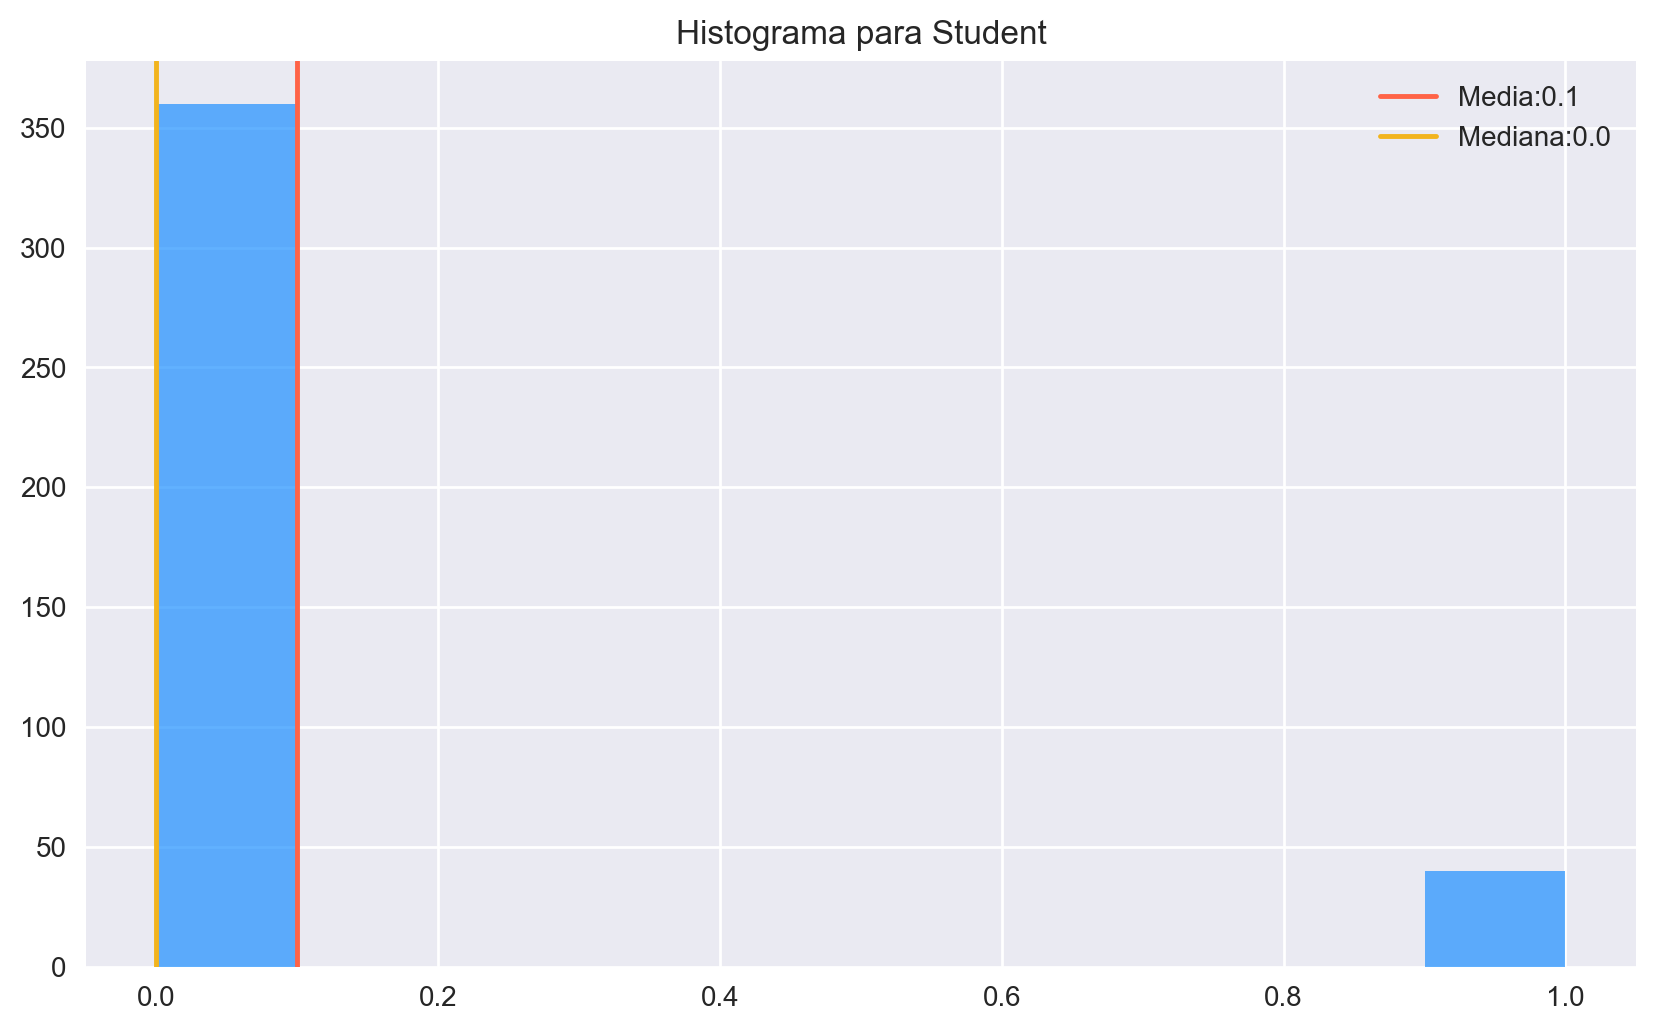

In [63]:
 plot_hist(df, 'Student')
    

# Desafío 3: Regresión Lineal Simple

In [58]:
model_student = smf.ols('Balance ~ Student', df).fit()
model_income = smf.ols('Balance ~ Income', df).fit()
model_rating = smf.ols('Balance ~ Rating', df).fit()

In [60]:
 print(model_student.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.49e-07
Time:                        19:48:05   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.0

In [61]:
print(model_income.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.03e-22
Time:                        19:48:54   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.0

In [62]:
print(model_rating.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.90e-120
Time:                        19:49:29   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.0

# Desafío 4: Generar un modelo que incluya todos los regresores

In [64]:
 model_1 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age +Education + Gender + Student + Married + AfrAmerican + Asian', df).fit()

In [65]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.11e-253
Time:                        19:57:54   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -488.2880     34.816    -14.025      

# Desafío 5: Depure el modelo e incluya sólo los predictores significativo

En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia 𝑝 − 𝑣𝑎𝑙𝑢𝑒 ≤. 025. Comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales características de los predictores.


In [66]:
model_2 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Student',df).fit()

In [67]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.60e-261
Time:                        20:02:45   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -526.1555     19.747    -26.645      0.0

In [72]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.60e-261
Time:                        20:07:10   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -526.1555     19.747    -26.645      0.0

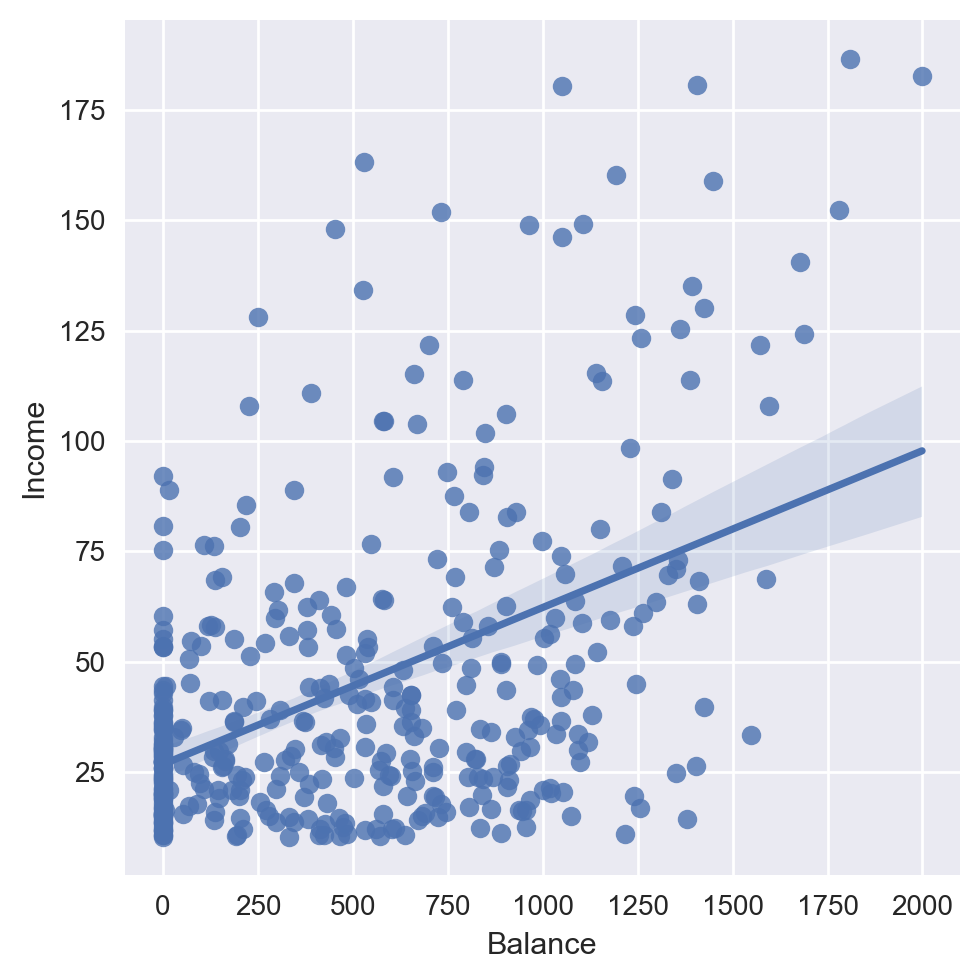

In [73]:
 sns.lmplot('Balance', 'Income', df);

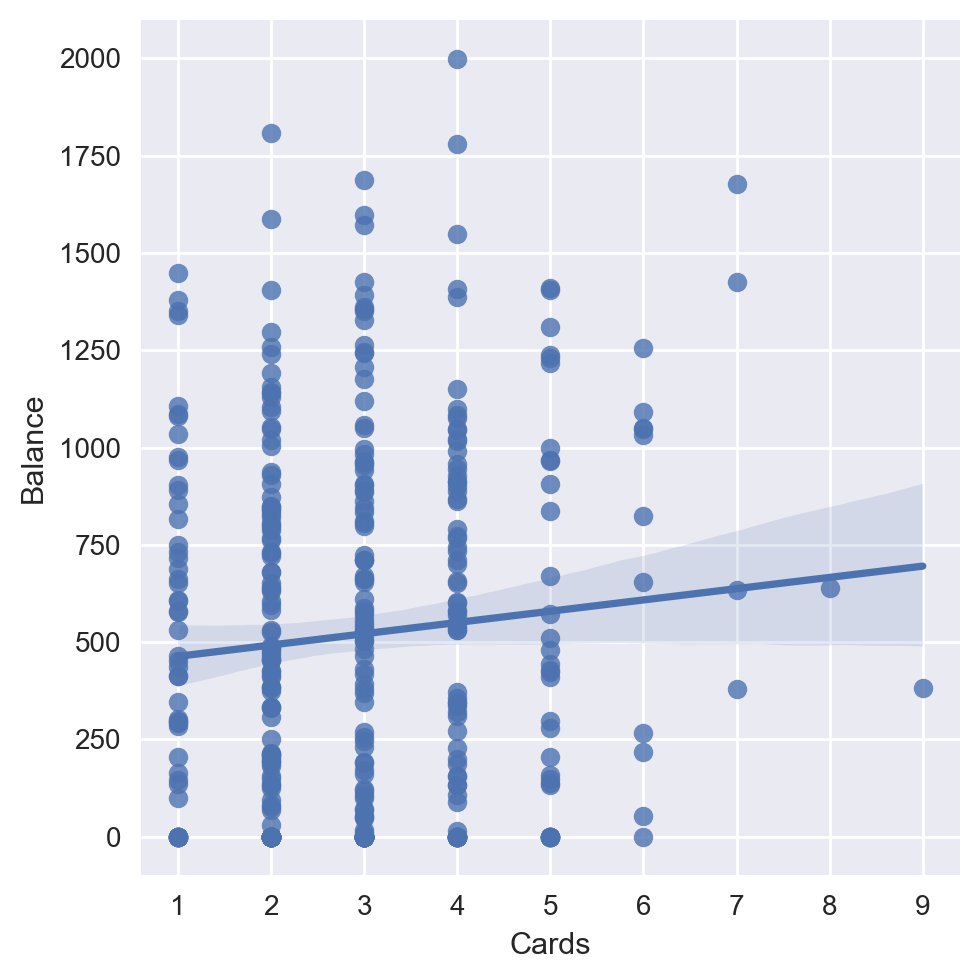

In [69]:
sns.lmplot('Cards', 'Balance', df)

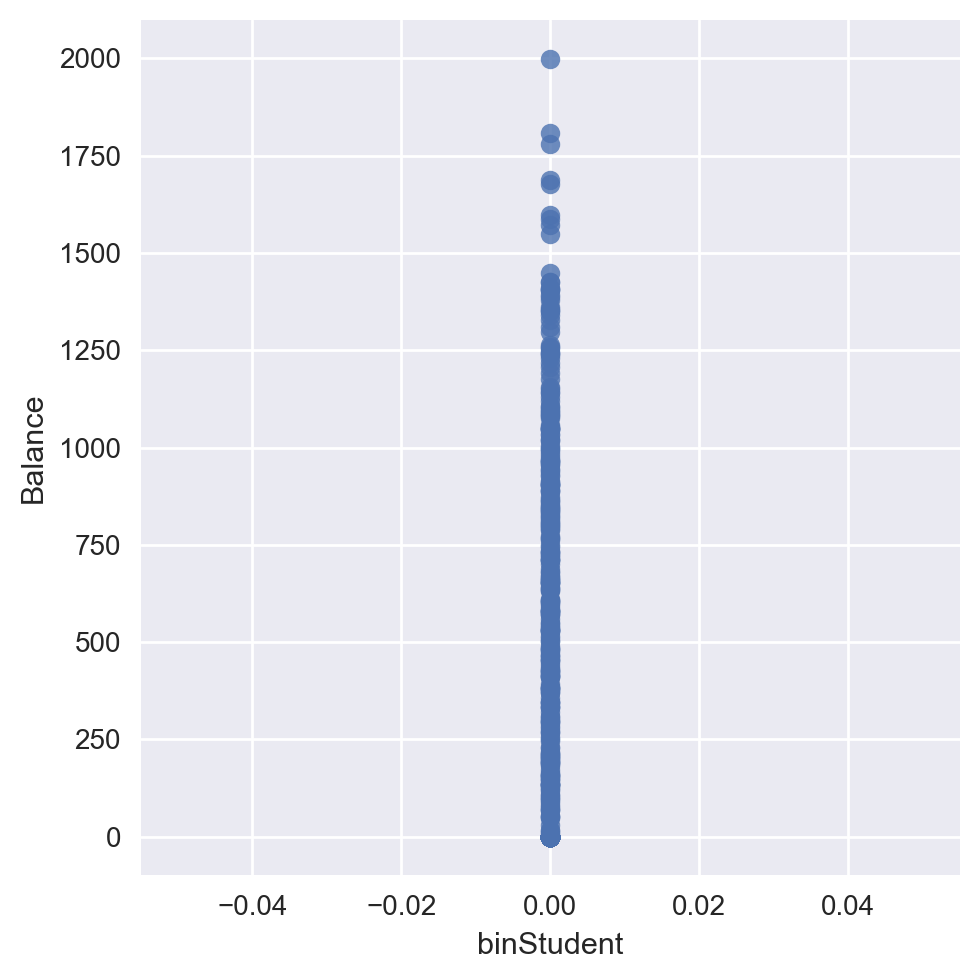

In [70]:
 df['binStudent'] = np.where(df['Student'] == 'Yes', 1, 0)
sns.lmplot('binStudent', 'Balance', df)

# MACHINE LEARNING

# machine learning utilizaremos scikit-learn

In [77]:
df = pd.read_csv('earnings.csv')

In [79]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [80]:
df.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
0,50000.0,6,2,1,1,2,16,45,74,45,2,3,1
1,60000.0,5,6,2,1,2,16,32,66,58,3,3,0
2,30000.0,5,4,2,1,2,16,61,64,29,1,3,0
3,51000.0,5,3,2,1,2,17,51,63,39,2,3,0
4,9000.0,5,4,2,1,2,15,64,64,26,1,3,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   earn          1374 non-null   float64
 1   height1       1374 non-null   int64  
 2   height2       1374 non-null   int64  
 3   sex           1374 non-null   int64  
 4   race          1374 non-null   int64  
 5   hisp          1374 non-null   int64  
 6   ed            1374 non-null   int64  
 7   yearbn        1374 non-null   int64  
 8   height        1374 non-null   int64  
 9   age           1374 non-null   int64  
 10  age_category  1374 non-null   int64  
 11  eth           1374 non-null   int64  
 12  male          1374 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 139.7 KB


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
y = df.earn
X = df[['height1','male']]

In [84]:
X.head()

,height1,male
0,6,1
1,5,0
2,5,0
3,5,0
4,5,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   earn          1374 non-null   float64
 1   height1       1374 non-null   int64  
 2   height2       1374 non-null   int64  
 3   sex           1374 non-null   int64  
 4   race          1374 non-null   int64  
 5   hisp          1374 non-null   int64  
 6   ed            1374 non-null   int64  
 7   yearbn        1374 non-null   int64  
 8   height        1374 non-null   int64  
 9   age           1374 non-null   int64  
 10  age_category  1374 non-null   int64  
 11  eth           1374 non-null   int64  
 12  male          1374 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 139.7 KB


In [91]:
X_train,X_test,  y_train,y_test = train_test_split(X,y, test_size = .30, random_state=12634)

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 939 to 987
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   height1  961 non-null    int64
 1   male     961 non-null    int64
dtypes: int64(2)
memory usage: 22.5 KB


In [95]:
X_train.head()

,height1,male
939,5,0
127,5,0
212,5,0
323,5,0
711,5,0


In [96]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 417 to 766
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   height1  413 non-null    int64
 1   male     413 non-null    int64
dtypes: int64(2)
memory usage: 9.7 KB


# 1Definir un algoritmo a utilizar. En este caso implementaremos LinearRegression, donde especificaremos que deseamos incluir un parámetro para el intercepto y deseamos normalizar las variables

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import 


In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression(fit_intercept=True)

In [100]:
model = model.fit(X_train, y_train)

In [102]:
predictores = model.predict(X_test)

In [104]:
X_test

,height1,male
417,5,0
188,5,0
933,5,0
1334,5,0
800,5,0
...,...,...
1091,5,1
499,5,0
193,5,1
891,5,0


In [105]:
y_test

417      8000.0
188     15000.0
933      5400.0
1334    25000.0
800     17000.0
         ...   
1091    28000.0
499     10000.0
193     49000.0
891     24000.0
766     24000.0
Name: earn, Length: 413, dtype: float64

In [103]:
predictores

array([14955.29643277, 14955.29643277, 14955.29643277, 14955.29643277,
       14955.29643277, 14955.29643277, 14955.29643277, 14955.29643277,
       14955.29643277, 14955.29643277, 14955.29643277, 14955.29643277,
       29638.2584696 , 14955.29643277, 14955.29643277, 14374.55233284,
       29057.51436967, 14955.29643277, 14955.29643277, 29057.51436967,
       29638.2584696 , 14955.29643277, 29057.51436967, 29057.51436967,
       29057.51436967, 14955.29643277, 14955.29643277, 14955.29643277,
       29057.51436967, 14955.29643277, 14955.29643277, 14955.29643277,
       14955.29643277, 14955.29643277, 14955.29643277, 14955.29643277,
       14955.29643277, 29057.51436967, 14955.29643277, 14955.29643277,
       14955.29643277, 14955.29643277, 14955.29643277, 14955.29643277,
       14955.29643277, 14955.29643277, 14955.29643277, 29057.51436967,
       29057.51436967, 14955.29643277, 29638.2584696 , 14955.29643277,
       14955.29643277, 29057.51436967, 29057.51436967, 14955.29643277,
      

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
print(mean_squared_error(y_test, predictores))

250105259.35333902


In [ ]:
15000
250105259

In [109]:
print(r2_score(y_test, predictores))

0.15757022628656991
